In [1]:
import pandas as pd
import oracledb
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

### 1. 성별에 따른 소비 분석 시각화

In [2]:
# 1. Oracle DB 연결 및 데이터 불러오기
conn = oracledb.connect(
    user="moa",
    password="moa",
    dsn="localhost:1521/XE"
)

query = """
SELECT
    g.gender,
    g.card_total,
    i.upjong
FROM
    gender_stats g
INNER JOIN
    industry_codes i
    ON g.upjong_code = i.upjong_code
"""

df = pd.read_sql(query, conn)
conn.close()

e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
df.rename(columns={
    'GENDER': 'gender',
    'CARD_TOTAL': 'card_total',
    'UPJONG': 'upjong',
}, inplace=True)

In [4]:
grouped = df.groupby(['gender', 'upjong'])['card_total'].sum().unstack()

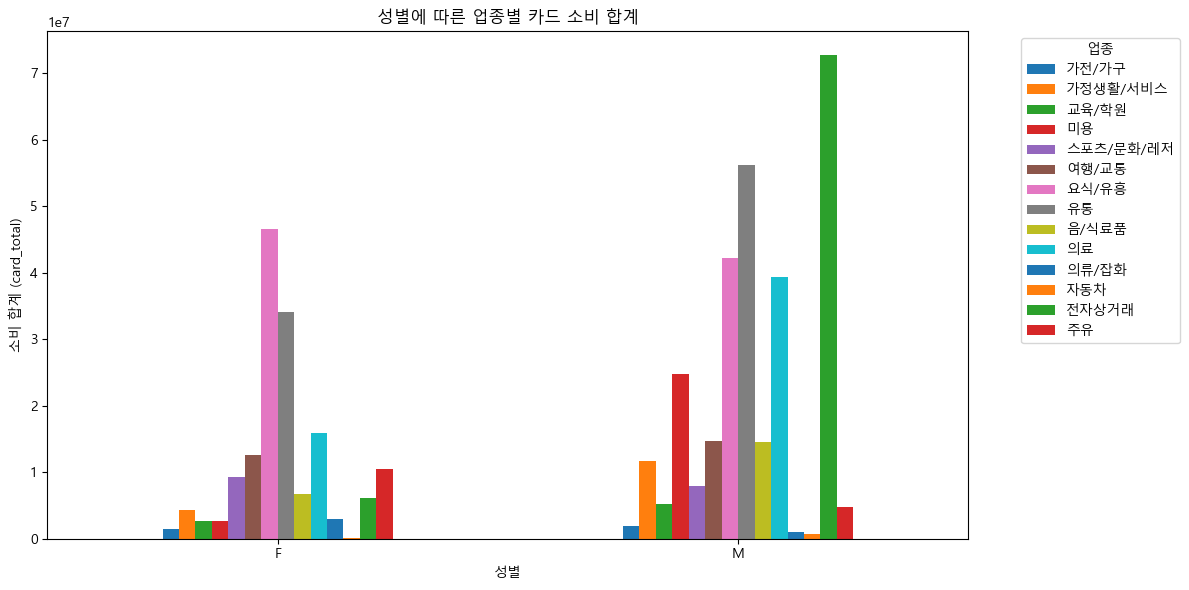

In [5]:
# 시각화
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('성별에 따른 업종별 카드 소비 합계')
plt.xlabel('성별')
plt.ylabel('소비 합계 (card_total)')
plt.xticks(rotation=0)
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2. 연령대에 따른 소비 분석 시각화

In [6]:
# 1. Oracle DB 연결 및 데이터 불러오기
conn = oracledb.connect(
    user="moa",
    password="moa",
    dsn="localhost:1521/XE"
)

query = """
SELECT
    a.age_group,
    a.card_total,
    i.upjong
FROM
    age_stats a
INNER JOIN
    industry_codes i
    ON a.upjong_code = i.upjong_code
"""

df = pd.read_sql(query, conn)
conn.close()

e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
df.rename(columns={
    'AGE_GROUP': 'age_group',
    'CARD_TOTAL': 'card_total',
    'UPJONG': 'upjong',
}, inplace=True)

In [8]:
grouped = df.groupby(['age_group', 'upjong'])['card_total'].sum().unstack()

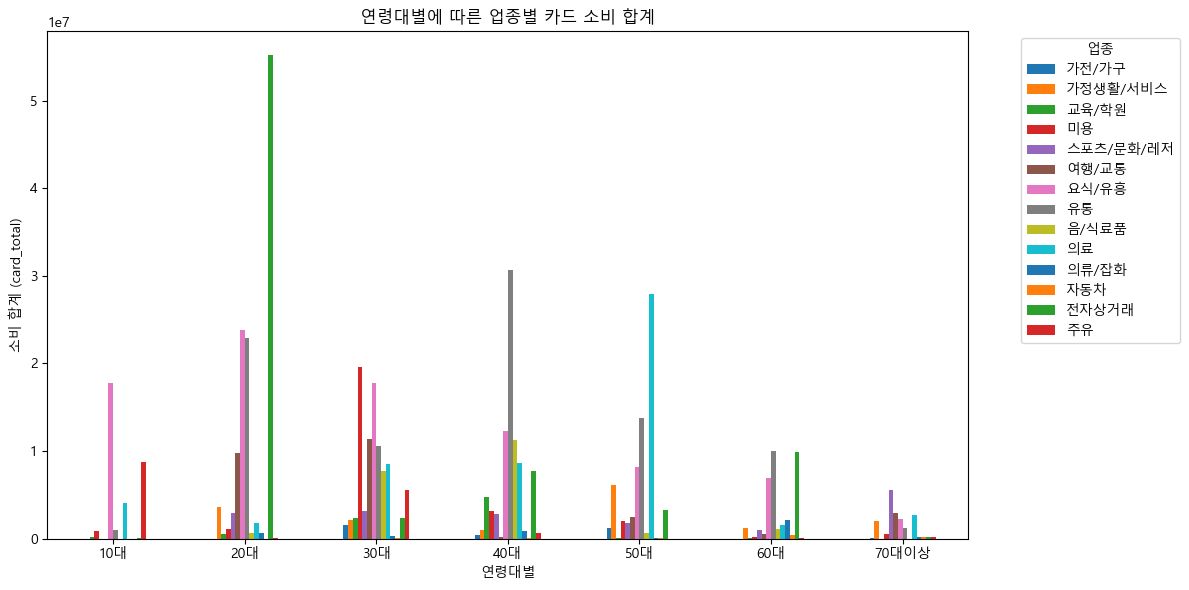

In [9]:
# 시각화
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('연령대별에 따른 업종별 카드 소비 합계')
plt.xlabel('연령대별')
plt.ylabel('소비 합계 (card_total)')
plt.xticks(rotation=0)
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3. 시간대에 따른 소비 분석 시각화

In [10]:
# 1. Oracle DB 연결 및 데이터 불러오기
conn = oracledb.connect(
    user="moa",
    password="moa",
    dsn="localhost:1521/XE"
)

query = """
SELECT
    m.time_slot,
    m.card_total,
    i.upjong
FROM
    micro_payment_stats m
INNER JOIN
    industry_codes i
    ON m.upjong_code = i.upjong_code
"""

df = pd.read_sql(query, conn)
conn.close()

e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [11]:
df.rename(columns={
    'TIME_SLOT': 'time_slot',
    'CARD_TOTAL': 'card_total',
    'UPJONG': 'upjong',
}, inplace=True)

In [12]:
grouped = df.groupby(['time_slot', 'upjong'])['card_total'].sum().unstack()

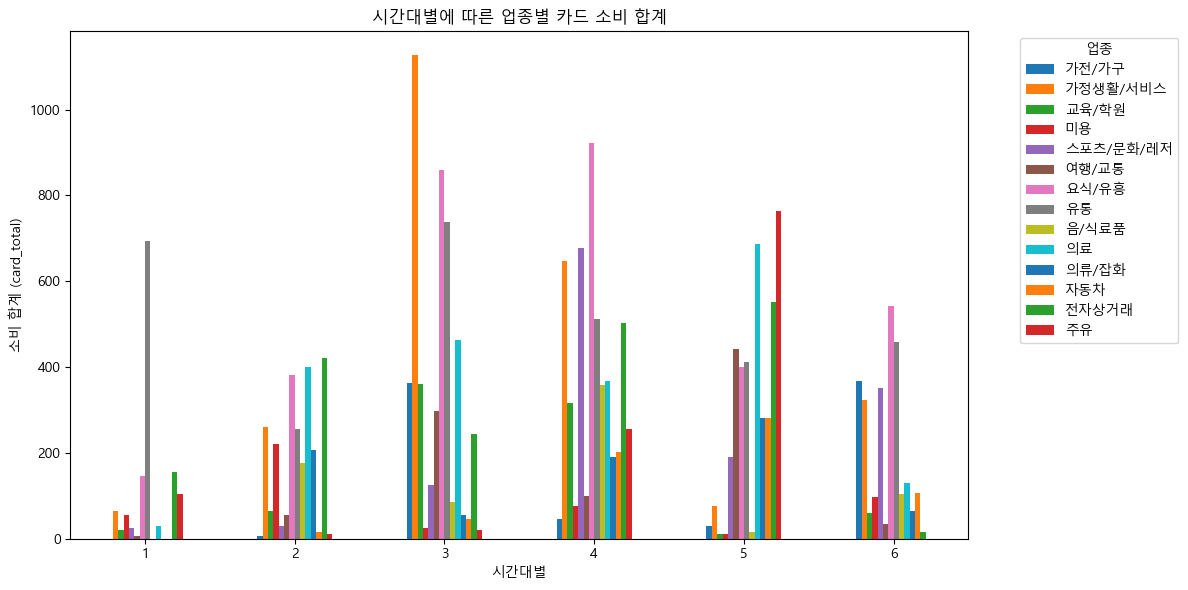

In [13]:
# 시각화
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('시간대별에 따른 업종별 카드 소비 합계')
plt.xlabel('시간대별')
plt.ylabel('소비 합계 (card_total)')
plt.xticks(rotation=0)
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4. 지역별에 따른 소비 분석 시각화

In [14]:
# 1. Oracle DB 연결 및 데이터 불러오기
conn = oracledb.connect(
    user="moa",
    password="moa",
    dsn="localhost:1521/XE"
)

query = """
SELECT
    r.sido,
    r.card_total,
    i.upjong
FROM
    region_stats r
INNER JOIN
    industry_codes i
    ON r.upjong_code = i.upjong_code
"""

df = pd.read_sql(query, conn)
conn.close()

e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [15]:
df.rename(columns={
    'SIDO': 'sido',
    'CARD_TOTAL': 'card_total',
    'UPJONG': 'upjong',
}, inplace=True)

In [16]:
grouped = df.groupby(['sido', 'upjong'])['card_total'].sum().unstack()

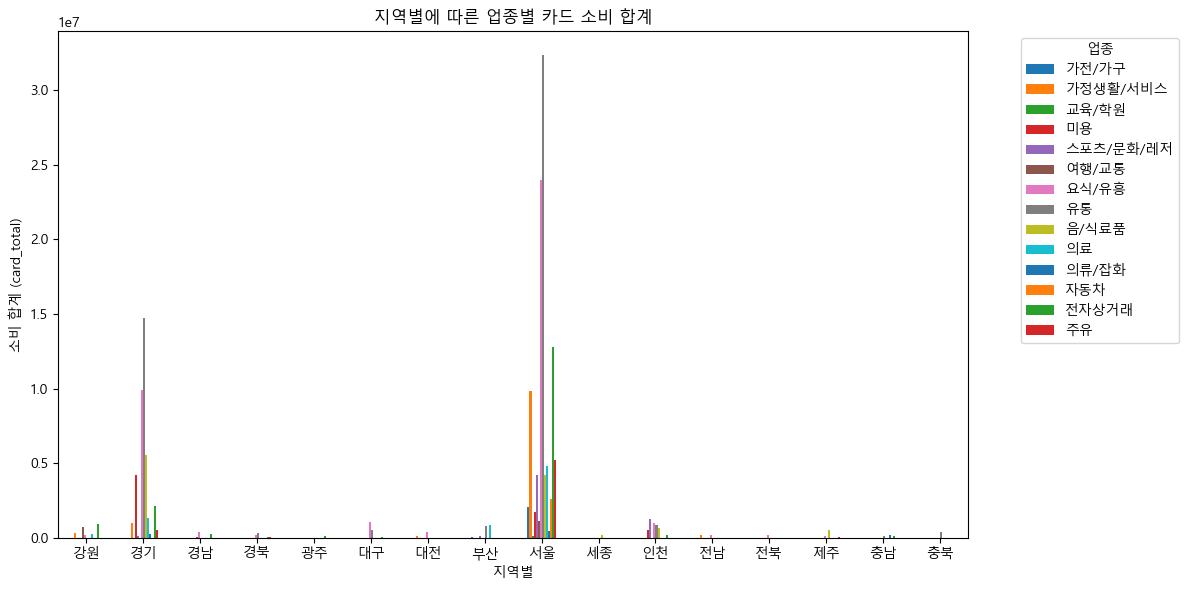

In [17]:
# 시각화
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('지역별에 따른 업종별 카드 소비 합계')
plt.xlabel('지역별')
plt.ylabel('소비 합계 (card_total)')
plt.xticks(rotation=0)
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 5. 카드 이용 금액별 사용 분석

In [72]:
# 1. Oracle DB 연결 및 데이터 불러오기
conn = oracledb.connect(
    user="moa",
    password="moa",
    dsn="localhost:1521/XE"
)

# 3개 테이블에서 card_total 가져오기
tables = ["gender_stats", "age_stats", "region_stats"]

# 모든 데이터프레임 컬럼명을 소문자로 변경
dfs = [df.rename(columns=str.lower) for df in dfs]

for table in tables:
    query = f"SELECT card_total FROM {table}"
    df_part = pd.read_sql(query, conn)
    dfs.append(df_part)

conn.close()

e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [80]:
# 모든 데이터 합치기
df_all = pd.concat(dfs, ignore_index=True)

# ---------------------
# 총액 기준
# ---------------------
bins_amount = [0, 500000, 1000000, 5000000, float('inf')]
labels_amount = ['A: 0~50만', 'A: 50만~100만', 'A: 100만~500만', 'A: 500만 이상']

df_all['amount_range_total'] = pd.cut(df_all['card_total'], 
                                      bins=bins_amount, 
                                      labels=labels_amount, 
                                      right=False)

range_sums = df_all.groupby('amount_range_total')['card_total'].sum()

# ---------------------
# 건수 기준
# ---------------------
bins_count = [0, 50000, 100000, 5000000, float('inf')]  # 동일한 구간
labels_count = ['C: 0~5만', 'C: 5만~10만', 'C: 10만~50만', 'C: 50만 이상']

df_all['amount_range_count'] = pd.cut(df_all['card_total'], 
                                      bins=bins_count, 
                                      labels=labels_count, 
                                      right=False)

range_counts = df_all['amount_range_count'].value_counts().sort_index()

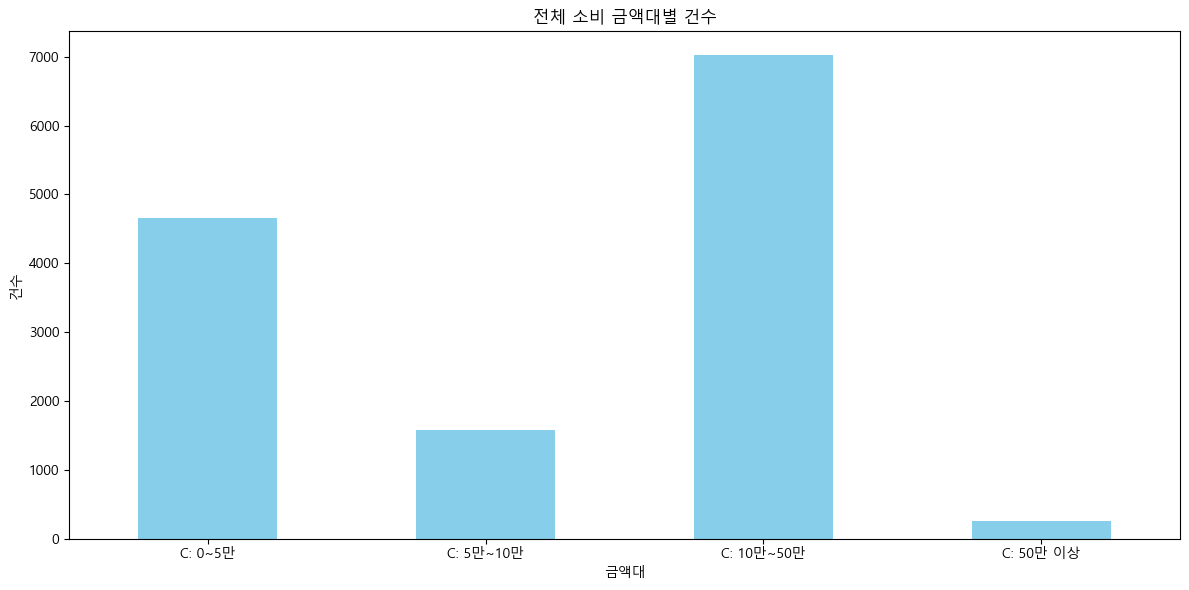

In [81]:
# --- 시각화 1: 건수 기준 ---
plt.figure(figsize=(12,6))
range_counts.plot(kind='bar', color='skyblue')
plt.title('전체 소비 금액대별 건수')
plt.xlabel('금액대')
plt.ylabel('건수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

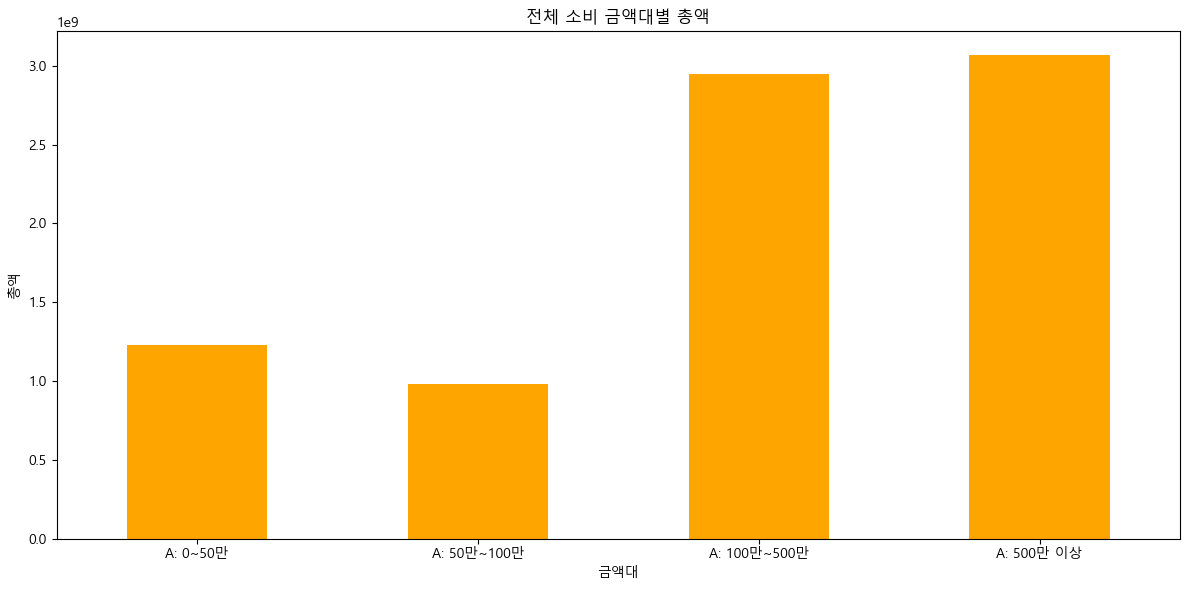

In [82]:
# --- 시각화 2: 총액 기준 ---
plt.figure(figsize=(12,6))
range_sums.plot(kind='bar', color='orange')
plt.title('전체 소비 금액대별 총액')
plt.xlabel('금액대')
plt.ylabel('총액')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [83]:
def recommend_card_by_amount_and_count(total_spent, transaction_count):
    recommendations = []

    # 총액 기준 추천
    if total_spent < 500000:
        recommendations.append("무실적 생활비 카드 추천")
    elif total_spent < 1000000:
        recommendations.append("소액 실적형 할인 카드 추천")
    elif total_spent < 5000000:
        recommendations.append("중간 실적 리워드 카드 추천")
    else:
        recommendations.append("프리미엄 리워드 카드 추천")

    # 건수 기준 추천
    if transaction_count < 50000:
        recommendations.append("저빈도 소액 카드 추천")
    elif transaction_count < 100000:
        recommendations.append("중빈도 카드 추천")
    elif transaction_count < 5000000:
        recommendations.append("고빈도 생활밀착 카드 추천")
    else:
        recommendations.append("초고빈도 프리미엄 카드 추천")

    # 중복 제거 후 추천 목록 반환
    return list(set(recommendations))

In [84]:
#예시
user_total_spent = 3000000
user_transaction_count = 60000

cards = recommend_card_by_amount_and_count(user_total_spent, user_transaction_count)
print(cards)

['중빈도 카드 추천', '중간 실적 리워드 카드 추천']


In [85]:
def recommend_card_by_demographics(gender, age, region, time_slot):
    recommendations = []

    # 성별 추천
    if gender == '여성':
        recommendations.append("뷰티·패션 특화 카드")
    elif gender == '남성':
        recommendations.append("주유·마트 특화 카드")

    # 연령별 추천
    if age < 30:
        recommendations.append("온라인 쇼핑·간편결제 특화 카드")
    elif 30 <= age < 50:
        recommendations.append("가족/외식 특화 카드")
    else:
        recommendations.append("여행·건강 특화 카드")

    # 지역별 추천
    big_cities = ['서울', '부산', '대구', '인천', '광주']
    if region in big_cities:
        recommendations.append("대형마트·교통 특화 카드")
    else:
        recommendations.append("지역 가맹점 할인 카드")

    # 시간대별 추천
    if time_slot in ['9~18']:
        recommendations.append("직장인 특화 카드")
    elif time_slot in ['18~24']:
        recommendations.append("심야 할인 카드")
    elif time_slot in ['0~6']:
        recommendations.append("무실적 생활밀착 카드")

    return list(set(recommendations))


In [86]:
# 예시
cards = recommend_card_by_demographics('여성', 28, '서울', '18~24')
print(cards)

['뷰티·패션 특화 카드', '온라인 쇼핑·간편결제 특화 카드', '심야 할인 카드', '대형마트·교통 특화 카드']
